In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

Load data

In [ ]:
# Load the MNIST dataset and split it into training, validation, and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Split Data

In [ ]:
x_train, x_valid = x_train[:48000], x_train[48000:]
y_train, y_valid = y_train[:48000], y_train[48000:]

Preprocess

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Create model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Train Model

In [14]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32, validation_data=(x_valid,y_valid))

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0336 - accuracy: 0.9904 - val_loss: 0.0423 - val_accuracy: 0.9905
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0785 - val_accuracy: 0.9833
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.0563 - val_accuracy: 0.9882
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0305 - accuracy: 0.9915 - val_loss: 0.0494 - val_accuracy: 0.9899
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9912 - val_loss: 0.0445 - val_accuracy: 0.9896
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0284 - accuracy: 0.9922 - val_loss: 0.0450 - val_accuracy: 0.9896
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9924 - val_loss: 0.0463 - val_accurac

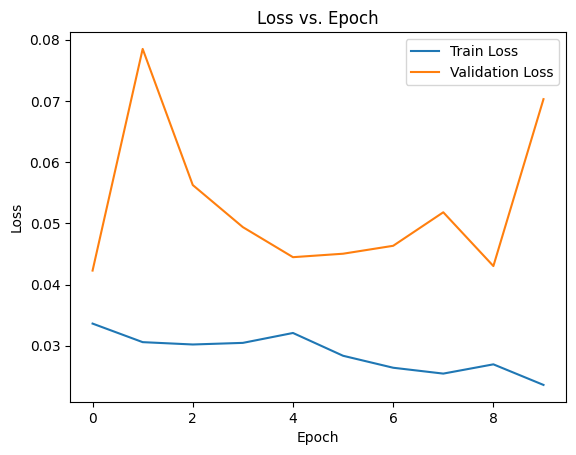

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

Plot Images

1/1 [==============================] - 0s 265ms/step


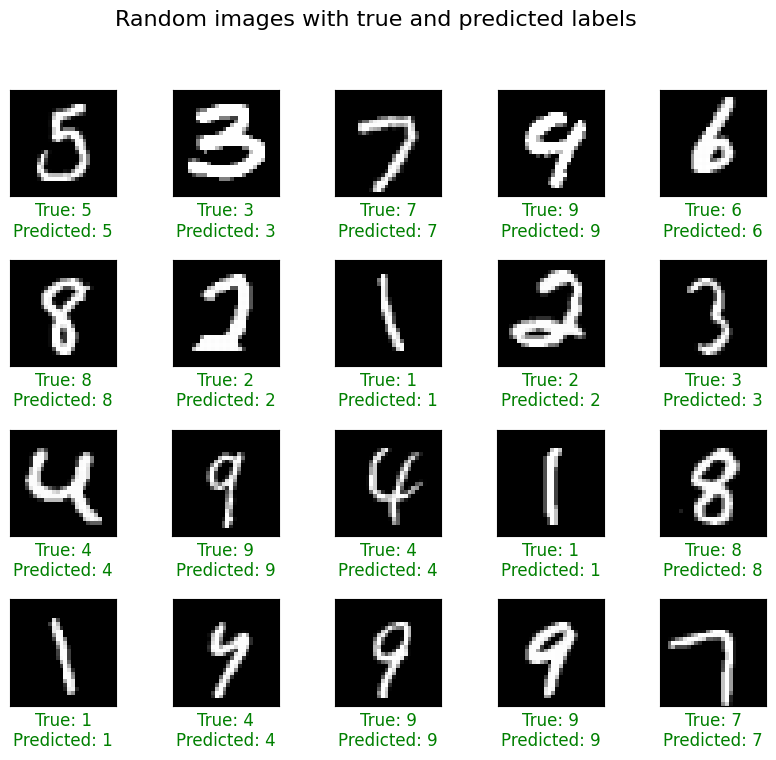

In [18]:
indices = np.random.randint(0, len(x_train), size=20)
images = x_train[indices]

true_labels = y_train[indices]

predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8), gridspec_kw={'wspace': 0.3, 'hspace': 0.6})
fig.suptitle('Random images with true and predicted labels', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')

    true_label = np.argmax(true_labels[i])
    predicted_label = predicted_labels[i]

    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'

    ax.set_xlabel(f'True: {true_label}\nPredicted: {predicted_label}', color=color, fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Evaluate

In [19]:

y_pred = np.argmax(model.predict(x_test), axis=-1)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

